### 導入模組

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader.data import DataReader
from datetime import date



In [82]:
start = date(2000,1,1)
WTI_price = pd.DataFrame(DataReader('DCOILWTICO', 'fred', start=start)).fillna(method  ='ffill')#將缺值用前一天補上
WTI_price['252_mean'] = WTI_price['DCOILWTICO'].rolling(window = 252).mean()#計算252天的moving average
WTI_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6367 entries, 2000-01-03 to 2024-05-28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DCOILWTICO  6366 non-null   float64
 1   252_mean    6115 non-null   float64
dtypes: float64(2)
memory usage: 149.2 KB


### WTI原油的日資料及其年線

Text(0.5, 1.0, 'WTI_oil_price')

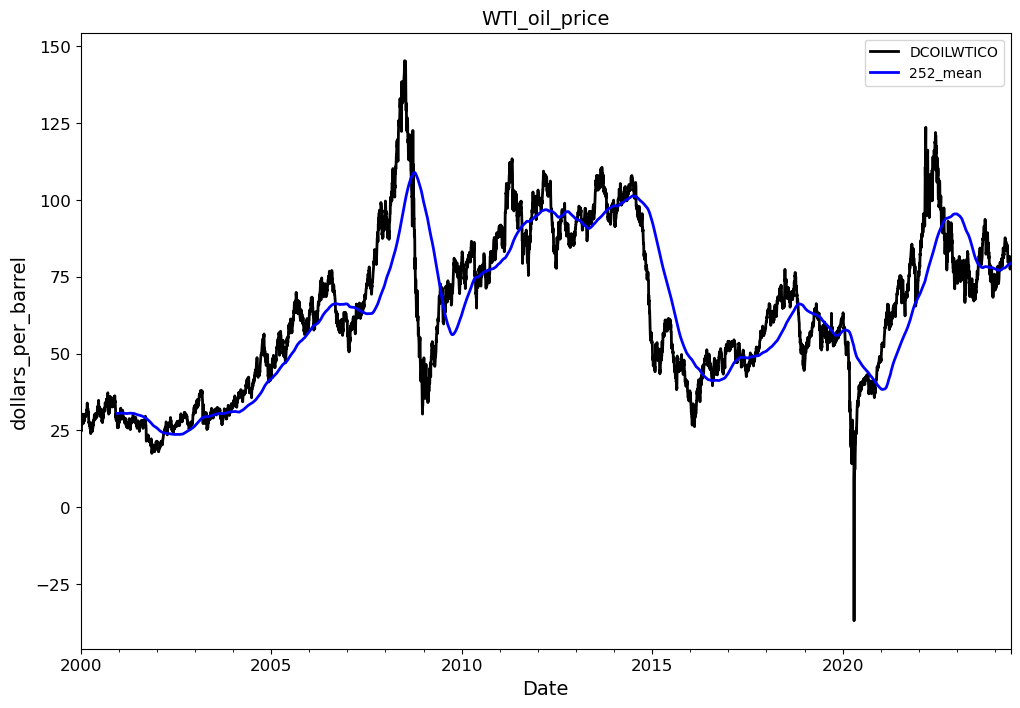

In [83]:
#畫出圖形
fig = WTI_price.plot(color=['black','blue'], figsize = (12,8), linewidth=2, fontsize=12)

fig.set_xlabel('Date',fontsize = 14)

fig.set_ylabel('dollars_per_barrel',fontsize = 14)

fig.set_title('WTI_oil_price',fontsize = 14)

### WTI原油的日報酬及經濟衰退期間

DATE
2000-01-31    27.65
2000-02-29    30.57
2000-03-31    26.86
2000-04-30    25.71
2000-05-31    29.03
              ...  
2023-12-31    71.89
2024-01-31    76.28
2024-02-29    79.22
2024-03-31    83.96
2024-04-30    83.49
Freq: M, Name: DCOILWTICO, Length: 292, dtype: float64


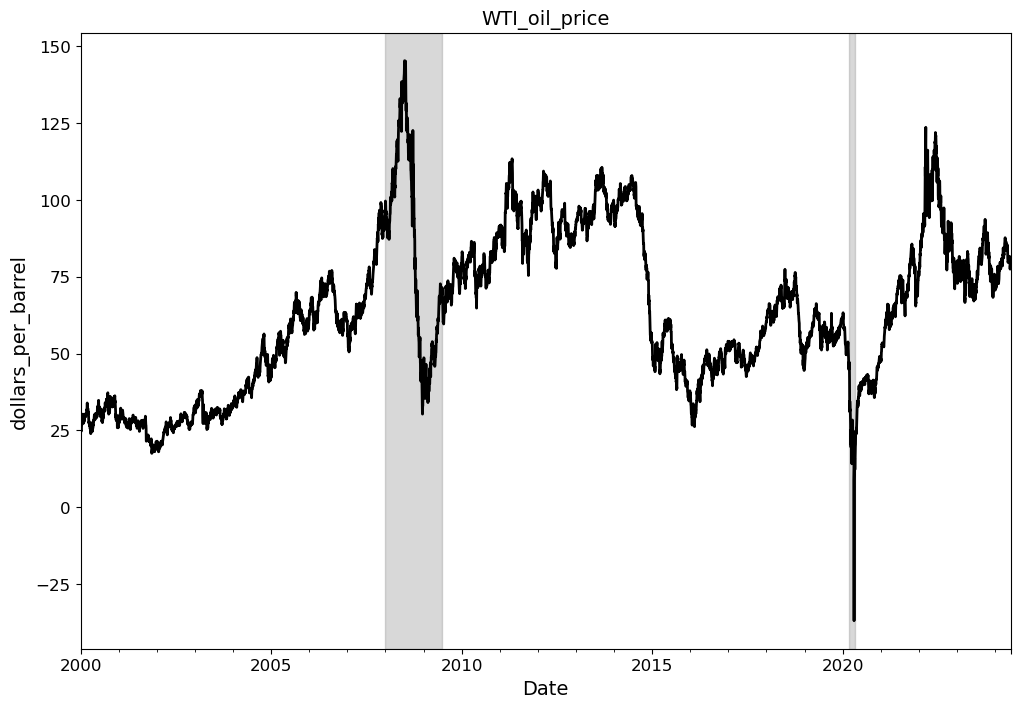

In [84]:
WTI_price_M = WTI_price.asfreq('M',method = 'ffill')#將日資料轉月資料，並用前一天的數據補齊缺值
print(WTI_price_M['DCOILWTICO'])
WTI_price_M['ret'] = WTI_price_M['DCOILWTICO'].pct_change()#計算月報酬率

#畫出圖形
fig1 = WTI_price['DCOILWTICO'].plot(color=['black'], figsize = (12,8), linewidth=2, fontsize=12)

fig1.set_xlabel('Date',fontsize = 14)

fig1.set_ylabel('dollars_per_barrel',fontsize = 14)

fig1.set_title('WTI_oil_price',fontsize = 14)

fig1.axvspan('2007-12-31', '2009-06-30', color='grey', alpha=0.3)

fig1.axvspan('2020-02-29','2020-04-30', color='grey', alpha=0.3)



### WTI原油的月報酬

Text(0.5, 1.0, 'WTI_oil_price_monthly_return')

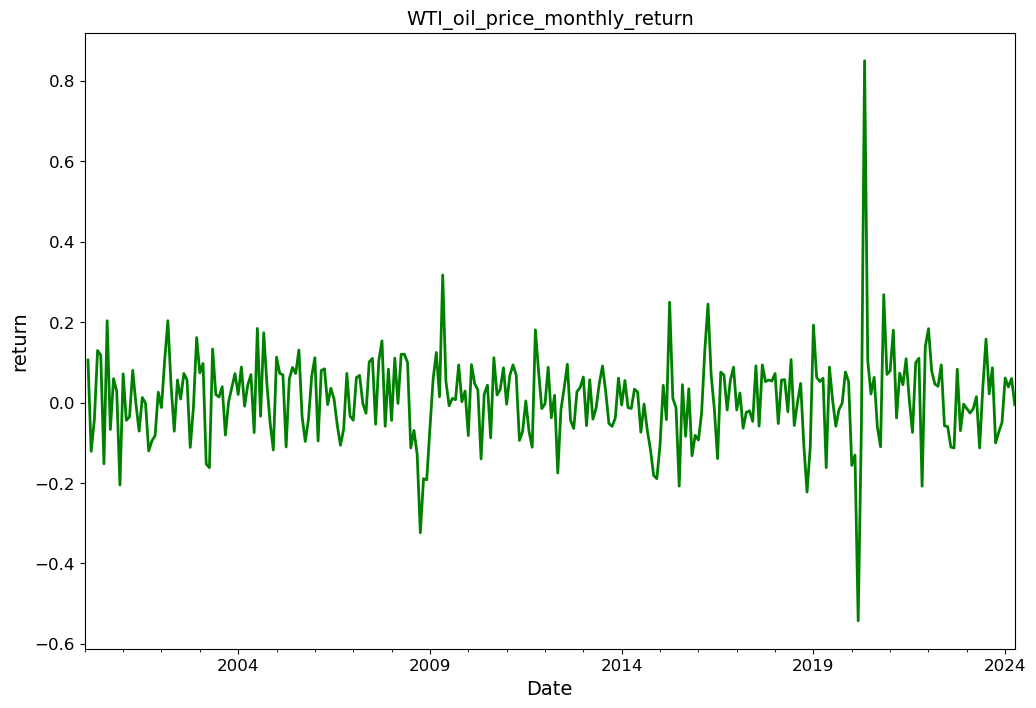

In [85]:
#畫出圖形
fig2 = WTI_price_M['ret'].plot(color=['green'], figsize = (12,8), linewidth=2, fontsize=12)

fig2.set_xlabel('Date',fontsize = 14)

fig2.set_ylabel('return',fontsize = 14)

fig2.set_title('WTI_oil_price_monthly_return',fontsize = 14)


### Assignment2

### 引入那斯達克指數的資料

In [86]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [87]:
start = date(1980,1,1)
NAS_index = pd.DataFrame(DataReader('NASDAQ100', 'fred', start=start)).fillna(method  ='ffill')#將缺值用前一天補上
NAS_index = NAS_index.rename(columns={'NASDAQ100':'price'})
NAS_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10022 entries, 1986-01-02 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   10022 non-null  float64
dtypes: float64(1)
memory usage: 156.6 KB


In [88]:
NAS_index_M = NAS_index.asfreq('M',method = 'ffill')#將日資料轉月資料，並用前一天的數據補齊缺值
print(NAS_index_M['price'])
NAS_index_M['ret'] = NAS_index_M['price'].pct_change()#計算月報酬率

DATE
1986-01-31      132.93
1986-02-28      140.43
1986-03-31      148.86
1986-04-30      154.91
1986-05-31      163.16
                ...   
2024-01-31    17137.24
2024-02-29    18043.85
2024-03-31    18254.69
2024-04-30    17440.69
2024-05-31    18536.65
Freq: M, Name: price, Length: 461, dtype: float64


In [89]:
index_ret_M = NAS_index_M['ret']
index_ret_M = index_ret_M[1:]#去除第一個月缺失的報酬率
index_ret_M

DATE
1986-02-28    0.056421
1986-03-31    0.060030
1986-04-30    0.040642
1986-05-31    0.053257
1986-06-30   -0.003310
                ...   
2024-01-31    0.018502
2024-02-29    0.052903
2024-03-31    0.011685
2024-04-30   -0.044591
2024-05-31    0.062839
Freq: M, Name: ret, Length: 460, dtype: float64

### 1.畫出月報酬率走勢

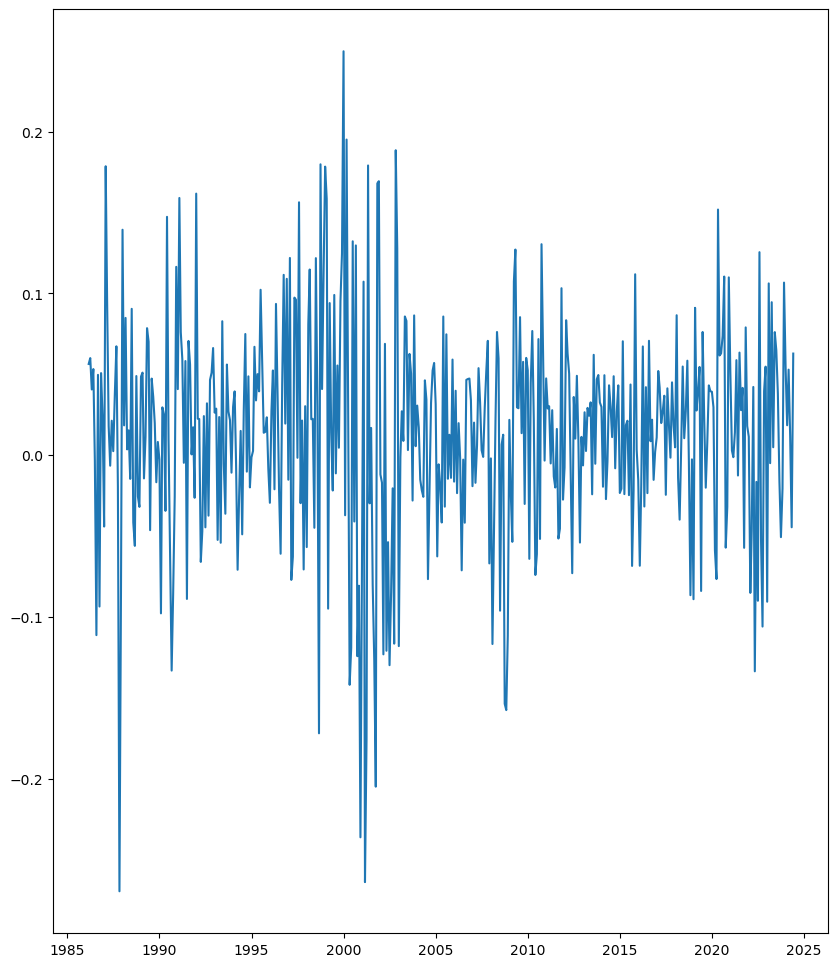

In [90]:
fig3 = plt.plot(index_ret_M)
fig3

### Ljung-Box Q test

In [91]:
qstat = acorr_ljungbox(index_ret_M, lags = 24)
qstat

,lb_stat,lb_pvalue
1,0.596767,0.439814
2,0.674432,0.713754
3,0.937475,0.816376
4,1.218328,0.875072
5,1.886339,0.864638
6,2.765751,0.837621
7,4.374487,0.735774
8,4.389610,0.820373
9,4.522250,0.873811
10,8.343034,0.595368


報酬率呈現 white noise

### 2.PACF & ACF

### ACF

[ 1.00000000e+00  3.59011922e-02 -1.29373891e-02  2.37832453e-02
 -2.45483321e-02 -3.78179107e-02  4.33435326e-02  5.85587235e-02
  5.67133604e-03 -1.67774185e-02  8.99461572e-02  4.06552896e-02
 -1.74847501e-02 -8.16443675e-02 -7.57325752e-03 -1.69305196e-02
  1.12954941e-02  4.11553151e-02 -4.04381705e-02  1.15019936e-02
 -3.49869570e-02  9.94014064e-04 -1.05743322e-02 -9.63140581e-03
  1.28535786e-02]


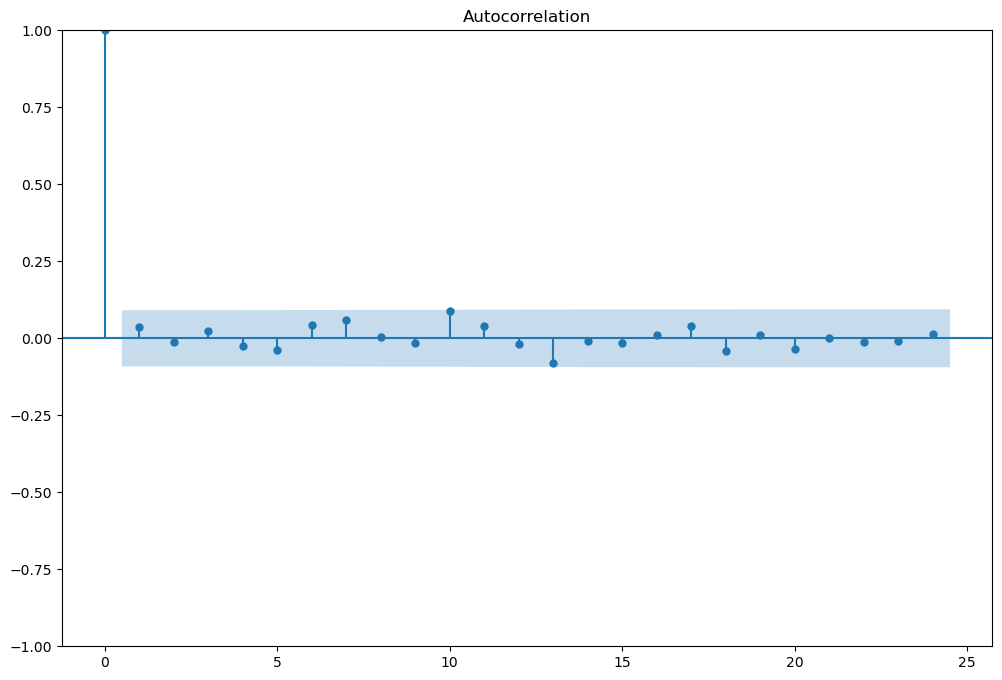

In [92]:
acf_array = acf(index_ret_M, nlags=24, fft=True)
print(acf_array)

# Plot the acf function
fig, ax = plt.subplots(figsize=(12,8))
plot_acf(index_ret_M, lags=24, alpha=0.05, ax=ax)
plt.show()

### PACF

[ 1.          0.03597941 -0.01430692  0.02496575 -0.02679871 -0.03573024
  0.04548409  0.05669001  0.00392517 -0.02030063  0.09221118  0.0413286
 -0.01570029 -0.09396987 -0.00417774 -0.0072547   0.01316703  0.02162572
 -0.05632376  0.02851281 -0.03699406  0.00417669 -0.01668597  0.00329371
  0.02225847]


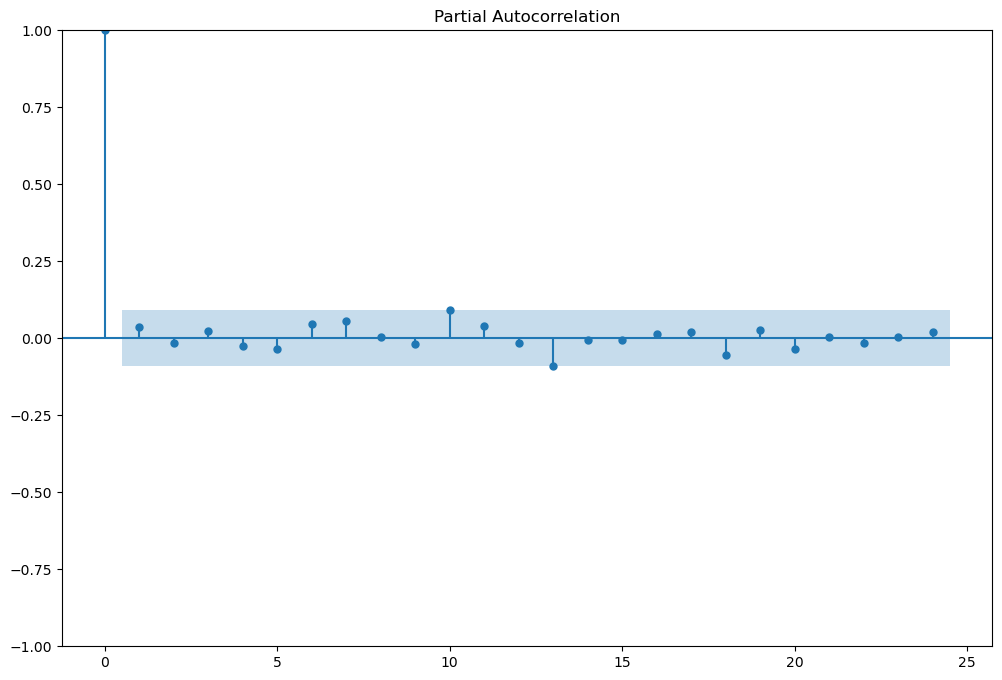

In [93]:
acf_array = pacf(index_ret_M, nlags=24)
print(acf_array)

# Plot the acf function
fig, ax = plt.subplots(figsize=(12,8))
plot_pacf(index_ret_M, lags=24, alpha=0.05, ax=ax)
plt.show()

從pacf和acf來看，那斯達克指數的報酬率應呈現white noise的走勢

### 3.選擇模型

In [94]:
import pmdarima as pm

In [95]:
model = pm.auto_arima(index_ret_M, max_p=5, max_q=5, stationary=True, information_criterion='aic', with_intercept=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1149.265, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1156.420, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1155.013, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1155.031, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1141.737, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1153.073, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.653 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  460
Model:                        SARIMAX   Log Likelihood                 580.210
Date:                Tue, 04 Jun 2024   AIC                          -1156.420
Time:                        14:16:49   BIC                          -1148.158
Sample:                    02-28-1986   HQIC                         -1153.166
    

最適模型為ARIMA(0,0,0)(0,0,0)with intercept

### 4.比較最適模型與ARMA11的AIC與BIC

In [96]:
model_WN = pm.ARIMA(order = (0,0,0),with_intercept=True).fit(index_ret_M)
print(model_WN.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  460
Model:                        SARIMAX   Log Likelihood                 580.210
Date:                Tue, 04 Jun 2024   AIC                          -1156.420
Time:                        14:16:50   BIC                          -1148.158
Sample:                    02-28-1986   HQIC                         -1153.166
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0132      0.003      4.046      0.000       0.007       0.020
sigma2         0.0047      0.000     20.035      0.000       0.004       0.005
Ljung-Box (L1) (Q):                   0.60   Jarque-

In [97]:
model_ARMA11 = pm.ARIMA(order = (1,0,1)).fit(index_ret_M)
print(model_ARMA11.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  460
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 580.536
Date:                Tue, 04 Jun 2024   AIC                          -1153.073
Time:                        14:16:50   BIC                          -1136.548
Sample:                    02-28-1986   HQIC                         -1146.566
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0142      0.012      1.201      0.230      -0.009       0.037
ar.L1         -0.0780      0.870     -0.090      0.929      -1.783       1.627
ma.L1          0.1159      0.872      0.133      0.8

In [98]:
print('Model\t\tAIC\t\tBIC')
print('ARIMA(0,0,0)\t%f\t%f\nARIMA(1,0,1)\t%f\t%f'%(model_WN.aic(),model_WN.bic(),model_ARMA11.aic(),model_ARMA11.bic()))

Model		AIC		BIC
ARIMA(0,0,0)	-1156.420074	-1148.157621
ARIMA(1,0,1)	-1153.072925	-1136.548019


### 5.檢查殘差是否為white noise

In [99]:
qstat_WN = acorr_ljungbox(model_WN.resid(),lags = 24)
qstat_WN

,lb_stat,lb_pvalue
1,0.596767,0.439814
2,0.674432,0.713754
3,0.937475,0.816376
4,1.218328,0.875072
5,1.886339,0.864638
6,2.765751,0.837621
7,4.374487,0.735774
8,4.389610,0.820373
9,4.522250,0.873811
10,8.343034,0.595368


In [100]:
qstat_ARMA11 = acorr_ljungbox(model_ARMA11.resid(),lags = 24)
qstat_ARMA11

,lb_stat,lb_pvalue
1,0.000773,0.977823
2,0.056915,0.971943
3,0.341733,0.951998
4,0.607941,0.962177
5,1.292445,0.935707
6,2.143264,0.906062
7,3.650302,0.819059
8,3.660420,0.886389
9,3.850986,0.920944
10,7.611544,0.666722


### 6.使用模型預測那斯達克指數的走勢

In [101]:
train, test = index_ret_M[:400], index_ret_M[400:]

In [102]:
Res = pm.ARIMA(order=(0,0,0),with_intercept= True).fit(train)

print(Res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:                        SARIMAX   Log Likelihood                 499.139
Date:                Tue, 04 Jun 2024   AIC                           -994.277
Time:                        14:16:50   BIC                           -986.294
Sample:                    02-28-1986   HQIC                          -991.116
                         - 05-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0125      0.004      3.522      0.000       0.006       0.019
sigma2         0.0048      0.000     19.107      0.000       0.004       0.005
Ljung-Box (L1) (Q):                   1.09   Jarque-

In [103]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

In [104]:
# numpy.array cannot use append command, so we convert the data to lists

forecasts=[]
confidence_intervals=[]
data = [x for x in train]  # convert np.array train to list data

In [105]:
for t in range(len(test)):
    Res = pm.ARIMA(order=(0,0,0),with_intercept=True).fit(data)
    fc, conf = Res.predict(n_periods=1, return_conf_int=True)
    forecasts.append(fc)
    confidence_intervals.append(conf)
    new_obs = test[t]
    data.append(new_obs)
    del data[0]  # This line keeps the same size at 400
    
    print('predicted=%f, expected=%f' %(fc, new_obs))

predicted=0.012455, expected=0.076194
predicted=0.012504, expected=0.023166
predicted=0.012412, expected=-0.020102
predicted=0.012260, expected=0.007600
predicted=0.012146, expected=0.043149
predicted=0.012262, expected=0.039567
predicted=0.012639, expected=0.039196
predicted=0.012613, expected=0.029593
predicted=0.012921, expected=-0.058909
predicted=0.012647, expected=-0.076618


d:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.012396, expected=0.151918
predicted=0.012886, expected=0.061664
predicted=0.012593, expected=0.062930
predicted=0.012509, expected=0.073746
predicted=0.012649, expected=0.110474
predicted=0.012941, expected=-0.057192
predicted=0.012745, expected=-0.031977
predicted=0.012659, expected=0.109959
predicted=0.012840, expected=0.050533
predicted=0.012798, expected=0.002879
predicted=0.012854, expected=-0.001233
predicted=0.013525, expected=0.014098
predicted=0.013776, expected=0.058765


d:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.013574, expected=-0.012571
predicted=0.013496, expected=0.063441
predicted=0.013443, expected=0.027833
predicted=0.013503, expected=0.041619
predicted=0.013569, expected=-0.057301
predicted=0.013462, expected=0.079025
predicted=0.013434, expected=0.018009
predicted=0.013583, expected=0.011413
predicted=0.013752, expected=-0.085173
predicted=0.013416, expected=-0.046366


d:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.013364, expected=0.042189
predicted=0.013550, expected=-0.133685
predicted=0.013094, expected=-0.016546
predicted=0.012925, expected=-0.090047
predicted=0.012736, expected=0.125546
predicted=0.013021, expected=-0.052204
predicted=0.012695, expected=-0.105998
predicted=0.012254, expected=0.039590


d:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.012469, expected=0.054753
predicted=0.012488, expected=-0.090631
predicted=0.012171, expected=0.106234
predicted=0.012387, expected=-0.004942
predicted=0.012416, expected=0.094604
predicted=0.012632, expected=0.004904
predicted=0.012651, expected=0.076106
predicted=0.013086, expected=0.064902
predicted=0.013175, expected=0.038065


d:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.013207, expected=-0.016242
predicted=0.013252, expected=-0.050695
predicted=0.012757, expected=-0.020758
predicted=0.012681, expected=0.106739
predicted=0.013105, expected=0.055058
predicted=0.013576, expected=0.018502
predicted=0.013836, expected=0.052903
predicted=0.014032, expected=0.011685
predicted=0.013770, expected=-0.044591
predicted=0.013556, expected=0.062839


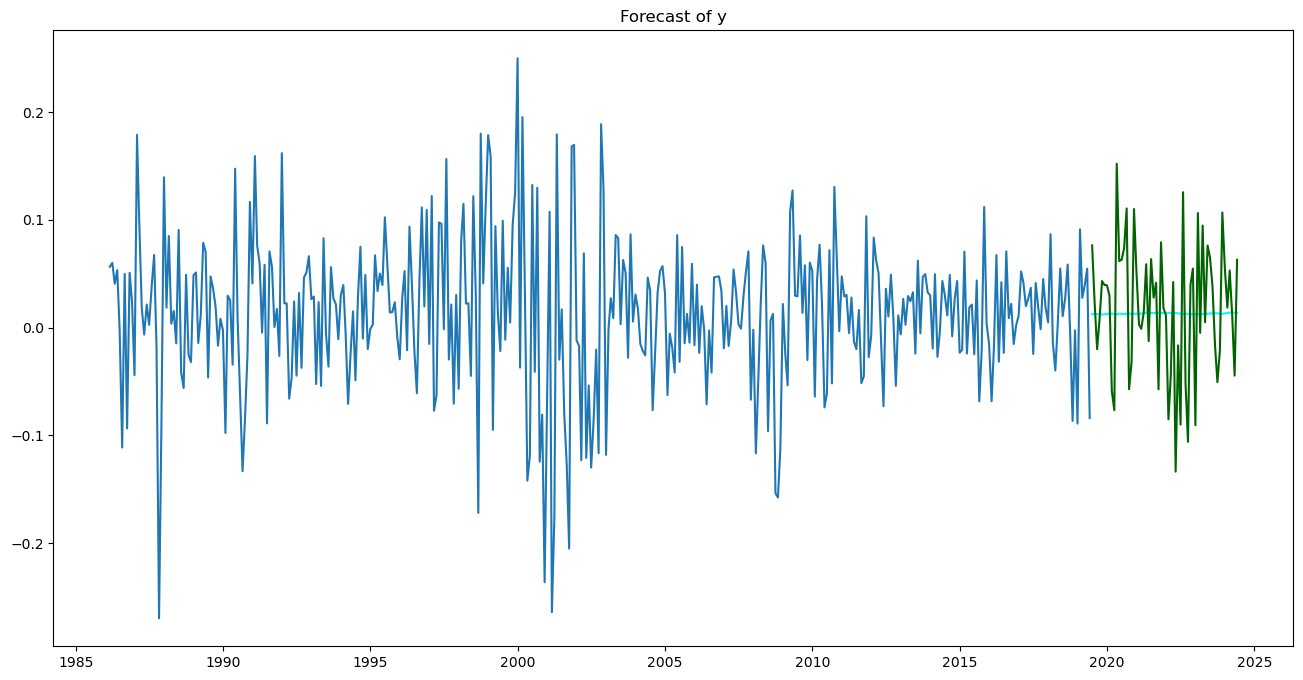

In [106]:
# index of forecasts
index_of_forecasts = index_ret_M.index[400:]


# make series for plotting purpose
forecasts_series = pd.Series(forecasts, index=index_of_forecasts)
# Plot
plt.figure(figsize=(16,8))
plt.plot(train)
plt.plot(forecasts_series, color='cyan')#預測的走勢
plt.plot(test, color='darkgreen')#實際的走勢

plt.title("Forecast of y")
plt.show()

### Assignment3

### 1.請檢查這組報酬率最適當的 conditional mean 模型為何。可以如 4-3 一樣使用 pm.auto_arima。

In [107]:
model = pm.auto_arima(index_ret_M, max_p=5, max_q=5, stationary=True, information_criterion='aic', with_intercept=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1149.265, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1156.420, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1155.013, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1155.031, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1141.737, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1153.073, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.700 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  460
Model:                        SARIMAX   Log Likelihood                 580.210
Date:                Tue, 04 Jun 2024   AIC                          -1156.420
Time:                        14:16:54   BIC                          -1148.158
Sample:                    02-28-1986   HQIC                         -1153.166
    

In [108]:
model_WN = pm.ARIMA(order = (0,0,0),with_intercept=True).fit(index_ret_M)
print(model_WN.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  460
Model:                        SARIMAX   Log Likelihood                 580.210
Date:                Tue, 04 Jun 2024   AIC                          -1156.420
Time:                        14:16:54   BIC                          -1148.158
Sample:                    02-28-1986   HQIC                         -1153.166
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0132      0.003      4.046      0.000       0.007       0.020
sigma2         0.0047      0.000     20.035      0.000       0.004       0.005
Ljung-Box (L1) (Q):                   0.60   Jarque-

In [109]:
qstat_WN = acorr_ljungbox(model_WN.resid(),lags = 24)
qstat_WN

,lb_stat,lb_pvalue
1,0.596767,0.439814
2,0.674432,0.713754
3,0.937475,0.816376
4,1.218328,0.875072
5,1.886339,0.864638
6,2.765751,0.837621
7,4.374487,0.735774
8,4.389610,0.820373
9,4.522250,0.873811
10,8.343034,0.595368


不存在自我相關，因此最適conditional mean模型是ARMA(0,0,0) with intercept


### 2.以 ARCH(1) 和 GARCH(1,1) 來估計這組報酬率的殘差項的 conditional variance，並分別以圖形顯示（請參考 4-2）。如果前面一題的結果發現存在 autocorrelation，可以使用 mean='AR', lags=p 來取代我們在課堂上使用的 mean='Zero' 或 mean=’constant’。這裡的 lags=p 的 p 是整數，意思是將 conditional mean 的部分用 AR(p) 模型來估計。

In [110]:
from arch import arch_model

 ARCH(1) 

In [111]:
res_arch1 = arch_model(index_ret_M, p = 1, mean='constant', vol = 'ARCH', dist = 'normal').fit()#python中p代表ARCH項，q代表GARCH項

# Display model fitting summary
print(res_arch1.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 932096.8356172445
Iteration:      2,   Func. Count:     14,   Neg. LLF: -239.72379889651927
Iteration:      3,   Func. Count:     21,   Neg. LLF: -583.7442670954517
Iteration:      4,   Func. Count:     27,   Neg. LLF: 30.953659041826796
Iteration:      5,   Func. Count:     33,   Neg. LLF: -601.8531538667688
Iteration:      6,   Func. Count:     38,   Neg. LLF: -601.8829388077031
Iteration:      7,   Func. Count:     41,   Neg. LLF: -601.8829388077074
Optimization terminated successfully    (Exit mode 0)
            Current function value: -601.8829388077031
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004698. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


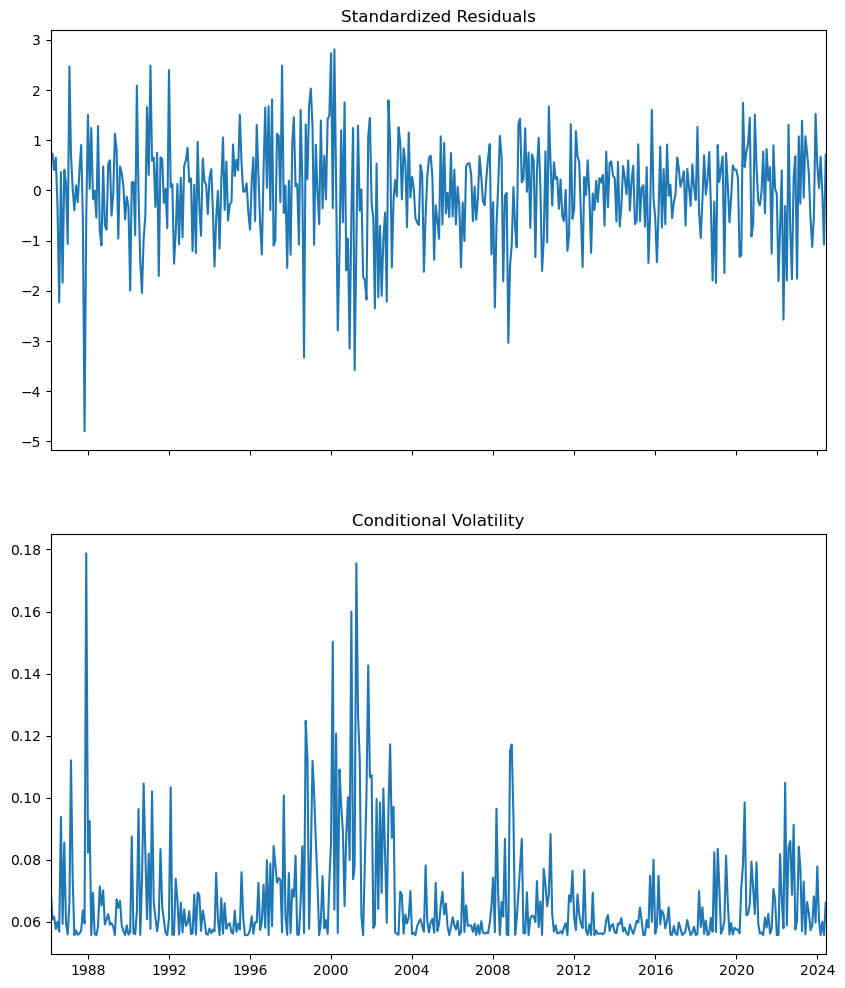

In [112]:
plt.rc("figure", figsize=(10,12))
res_arch1.plot()
plt.show()


GARCH(1,1)

In [113]:
res_garch11 = arch_model(index_ret_M, p = 1, q=1, mean='constant', vol = 'GARCH', dist = 'normal').fit()

# Display model fitting summary
print(res_garch11.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 388147273148378.56
Iteration:      2,   Func. Count:     16,   Neg. LLF: 244834142.79574558
Iteration:      3,   Func. Count:     24,   Neg. LLF: -488.66719721242896
Iteration:      4,   Func. Count:     31,   Neg. LLF: -567.7408531368399
Iteration:      5,   Func. Count:     38,   Neg. LLF: 558.1971445476825
Iteration:      6,   Func. Count:     45,   Neg. LLF: -627.5316758296635
Iteration:      7,   Func. Count:     51,   Neg. LLF: -630.150818805221
Iteration:      8,   Func. Count:     57,   Neg. LLF: -630.1781446937566
Iteration:      9,   Func. Count:     63,   Neg. LLF: -630.1844847943321
Optimization terminated successfully    (Exit mode 0)
            Current function value: -630.1844847943321
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    ret   R-squared:       

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004698. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


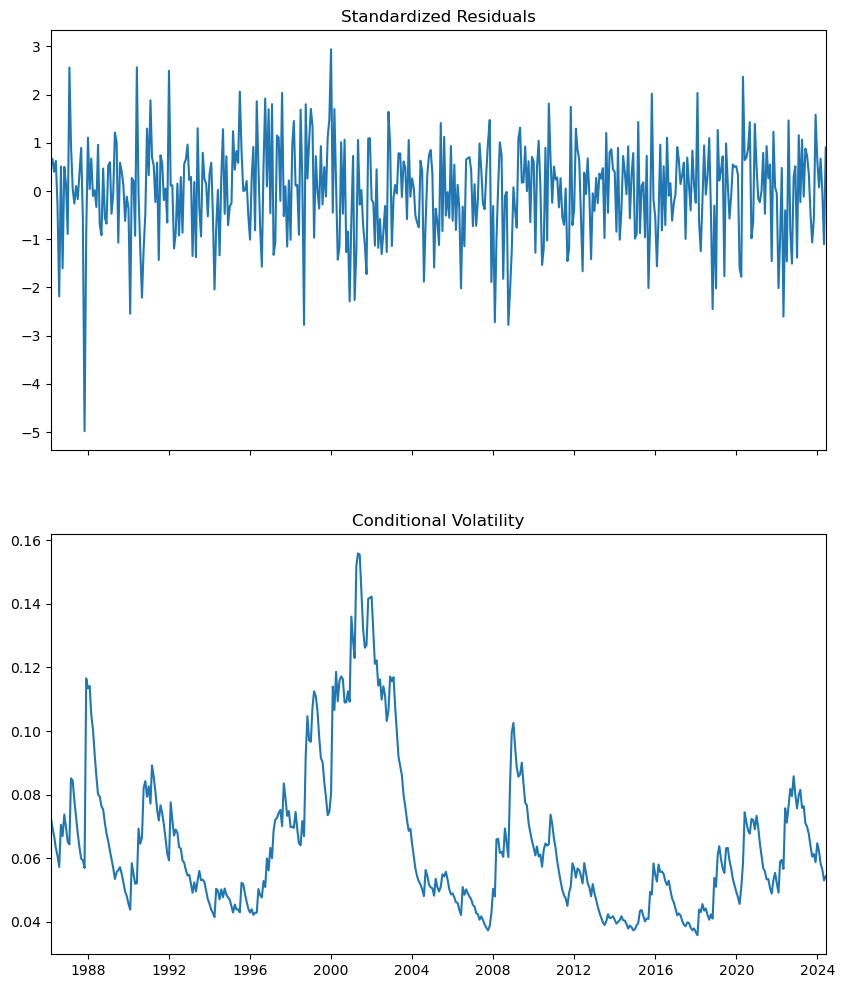

In [114]:
plt.rc("figure", figsize=(10,12))
res_garch11.plot()
plt.show()

### 用 AIC/BIC 來比較 ARCH(1) 與 GARCH(1,1) 何者較優，並且用較優的模型來估計未來一期的variance。

In [115]:
print('Model\t\tAIC\t\tBIC')
print('GARCH(1,1)\t%f\t%f\nARCH(1) \t%f\t%f'%(res_garch11.aic,res_garch11.bic,res_arch1.aic,res_arch1.bic))

Model		AIC		BIC
GARCH(1,1)	-1252.368970	-1235.844064
ARCH(1) 	-1197.765878	-1185.372198


無論用aic or bic比較，GARCH皆較佳

In [116]:
res_garch11.forecast(horizon=1).variance


,h.1
DATE,
2024-05-31,0.002933


### 4.計算較優的模型的標準化殘差項平方，並檢查此平方項是否具有自我相關現象（4-2 的 Ljung-Box Q-stat 或 LM Test 其中之一）

In [117]:
residsq = res_garch11.std_resid**2

In [118]:
qstat = acorr_ljungbox(residsq, lags=16, return_df=True)

qstat

,lb_stat,lb_pvalue
1,0.289378,0.590620
2,0.964389,0.617427
3,0.976650,0.806902
4,1.000769,0.909679
5,1.327939,0.932031
6,1.490047,0.960153
7,1.832035,0.968549
8,1.867146,0.984817
9,4.617105,0.866328
10,4.621495,0.914988


殘差項平方無自我相關，條件變異數不存在異質性

In [119]:
resid_std = res_garch11.std_resid/res_garch11.conditional_volatility
resid_stdsq = resid_std**2

In [120]:
qstat = acorr_ljungbox(resid_std, lags=16, return_df=True)

qstat

,lb_stat,lb_pvalue
1,0.602532,0.437614
2,1.185608,0.552775
3,1.202257,0.752463
4,5.282832,0.259488
5,6.018263,0.304446
6,6.350204,0.385124
7,8.975595,0.254413
8,11.288319,0.185892
9,11.866448,0.220943
10,12.338259,0.263056


p value>0.05 表示標準化殘差平方不存在自我相關，此模型可以使用

### 5.以EGARCH或GJR-GARCH檢查較好的模型是否存在leverage effect，omega 設定1即可。

In [121]:
res_gjr = arch_model(index_ret_M, mean='constant',p = 1, q = 0, o =1, vol = 'GARCH', dist = 'normal').fit(disp = 'off')

print(res_gjr.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                603.994
Distribution:                  Normal   AIC:                          -1199.99
Method:            Maximum Likelihood   BIC:                          -1183.46
                                        No. Observations:                  460
Date:                Tue, Jun 04 2024   Df Residuals:                      459
Time:                        14:16:55   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0138  2.769e-03      4.982  6.308e-07 [8.

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004698. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


omega係數雖然很小但顯著，代表那斯達克指數存在極小的leverage effect

### Assignment4

### 1.將價格拿來做 augmented Dickey-Fuller test來檢查其是否為unit root process，把價格轉換為月報酬後，也同樣的用 augmented Dickey-Fuller test來檢查其是否具有單根。。

In [122]:
from statsmodels.tsa.stattools import adfuller

Nasdaq指數價格

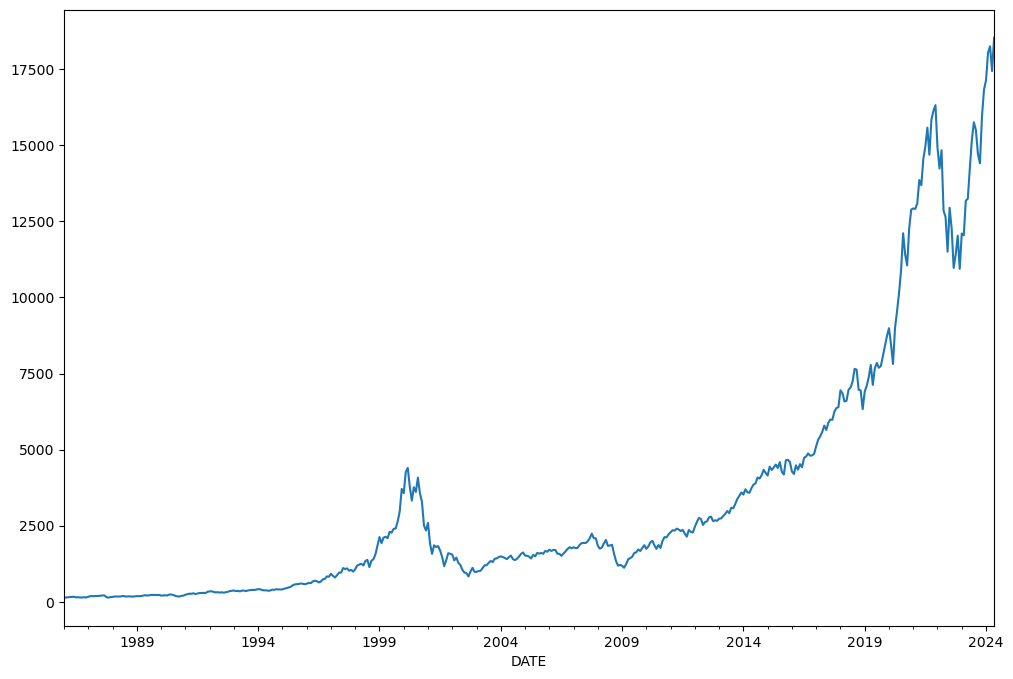

In [123]:
NAS_index_M['price'].plot(figsize=(12,8))

plt.show()

In [124]:
adf_res1, pvalue1, critvalues1, resstore1 = adfuller(NAS_index_M['price'], regression = 'ct', autolag='t-stat',regresults=True)

In [125]:
pvalue1

1.0

In [126]:
resstore1.resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     4.730
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           2.34e-10
Time:                        14:16:56   Log-Likelihood:                -3141.9
No. Observations:                 442   AIC:                             6326.
Df Residuals:                     421   BIC:                             6412.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0094      0.007      1.368      0.172      -0.004       0.023
x2            -0.0845      0.050     -1.688      0.092      -0.183       0.014
x3             0.0635      0.050      1.261      0.208      -0.035       0.163
x4             0.0002      0.050      0.005      0.996      -0.099       0.099
x5             0.0936      0.050      1.859      0.064      -0.005       0.193
x6            -0.0057      0.049     -0.116      0.908      -0.103       0.091
x7             0.0203      0.050      0.408      0.684      -0.078       0.118
x8             0.1945      0.051      3.820      0.000       0.094       0.295
x9             0.0982      0.052      1.877      0.061      -0.005       0.201
x10           -0.1930      0.054     -3.567      0.000      -0.299      -0.087
x11           -0.0165      0.054     -0.308      0.758      -0.122       0.089
x12           -0.0139      0.054     -0.259      0.796      -0.119       0.091
x13           -0.0253      0.053     -0.474      0.636      -0.130       0.080
x14           -0.0821      0.054     -1.520      0.129      -0.188       0.024
x15           -0.2305      0.054     -4.255      0.000      -0.337      -0.124
x16           -0.0532      0.056     -0.955      0.340      -0.163       0.056
x17            0.1804      0.056      3.242      0.001       0.071       0.290
x18           -0.0148      0.057     -0.259      0.795      -0.127       0.097
x19           -0.1229      0.057     -2.141      0.033      -0.236      -0.010
const        -20.6020     31.987     -0.644      0.520     -83.477      42.273
x20            0.1573      0.192      0.818      0.414      -0.221       0.535
==============================================================================
Omnibus:                      102.028   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1585.457
Skew:                          -0.492   Prob(JB):                         0.00
Kurtosis:                      12.226   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

note : pvalue = 1，代表Nasdaq指數價格不拒絕存在單根的虛無假設

Nasdaq月報酬率

In [127]:
adf_res2, pvalue2, critvalues2, resstore2 = adfuller(index_ret_M, regression = 'n', autolag='t-stat',regresults=True)

In [128]:
pvalue2

1.1634463317205967e-06

In [129]:
resstore2.resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.478
Model:                            OLS   Adj. R-squared (uncentered):              0.467
Method:                 Least Squares   F-statistic:                              40.37
Date:                Tue, 04 Jun 2024   Prob (F-statistic):                    3.42e-56
Time:                        14:16:56   Log-Likelihood:                          566.19
No. Observations:                 450   AIC:                                     -1112.
Df Residuals:                     440   BIC:                                     -1071.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6254      0.126     -4.979      0.000      -0.872      -0.379
x2            -0.3116      0.122     -2.557      0.011      -0.551      -0.072
x3            -0.3080      0.118     -2.618      0.009      -0.539      -0.077
x4            -0.2637      0.113     -2.339      0.020      -0.485      -0.042
x5            -0.2680      0.106     -2.525      0.012      -0.477      -0.059
x6            -0.2774      0.098     -2.841      0.005      -0.469      -0.086
x7            -0.2086      0.089     -2.356      0.019      -0.383      -0.035
x8            -0.1338      0.078     -1.707      0.089      -0.288       0.020
x9            -0.1096      0.065     -1.688      0.092      -0.237       0.018
x10           -0.1123      0.047     -2.379      0.018      -0.205      -0.020
==============================================================================
Omnibus:                       17.454   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.273
Skew:                          -0.196   Prob(JB):                     3.61e-08
Kurtosis:                       4.294   Cond. No.                         10.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note : pvalue < 1，拒絕Nasdaq月報酬率存在單根的虛無假設

### 2.使用KPSS檢定來檢查上面一個小題的價格與報酬率是否為stationary process。

Nasdaq指數價格

In [130]:
from statsmodels.tsa.stattools import kpss

In [131]:
price_kpss_res = kpss(NAS_index_M['price'], regression='ct', nlags='auto', store=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_29308\4112947315.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  price_kpss_res = kpss(NAS_index_M['price'], regression='ct', nlags='auto', store=True)


In [132]:
price_kpss_res

(0.6441919989742231,
 0.01,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216},
 <statsmodels.stats.diagnostic.ResultsStore at 0x18d55fd9c10>)

從KPSS檢定的結果來看，0.01代表檢定的p value小於0.01。拒絕KPSS的虛無假設 : 序列為定態。因此NASDAQ指數價格為非定態趨勢

Nasdaq月報酬率

In [133]:
ret_kpss_res = kpss(index_ret_M, nlags='auto', store=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_29308\240534747.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  ret_kpss_res = kpss(index_ret_M, nlags='auto', store=True)


In [134]:
ret_kpss_res

(0.07217335521704832,
 0.1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739},
 <statsmodels.stats.diagnostic.ResultsStore at 0x18d4c76b510>)

從KPSS檢定的結果來看，0.1代表檢定的p value1不小於0.1。不拒絕KPSS的虛無假設 : 序列為定態。因此NASDAQ指數報酬率為定態趨勢

### 3.用 pm.auto_arima 來估計價格資料適用的模型

In [135]:
auto_arima = pm.auto_arima(NAS_index_M['price'],information_criterion='aic',max_d=1, seasonal=False, with_intercept=True, trend='ct', suppress_warnings=True, trace=True)
print(auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6611.719, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6612.365, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6612.428, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6611.719, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6614.340, Time=0.44 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.457 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  461
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3302.860
Date:                Tue, 04 Jun 2024   AIC                           6611.719
Time:                        14:16:58   BIC                           6624.113
Sample:                    01-31-1986   HQIC                          6616.600
               

使用auto arima得出的最適模型為無截距的WHITE NOISE模型

### 4.將價格原始樣本保留最後10期，然後用其餘資料估計最適合的模型並預估接下來 10 期的資料（不需要使用 rolling-window）並做圖。

In [136]:
train, test  = NAS_index_M.iloc[:-10],NAS_index_M.iloc[-10:]

In [137]:
len(train), len(test)

(451, 10)

In [144]:
model = pm.ARIMA((0,1,0),trend='ct').fit(train['price'])

In [146]:
fc, conf_int = model.predict(n_periods=10, return_conf_int=True)

# Generate index for series
index_of_fc = NAS_index_M.index[-10:]

# Generate series for ploting
fc_series = pd.Series(fc, index=index_of_fc)
lower = pd.Series(conf_int[:,0], index=index_of_fc)
upper = pd.Series(conf_int[:,1], index=index_of_fc)

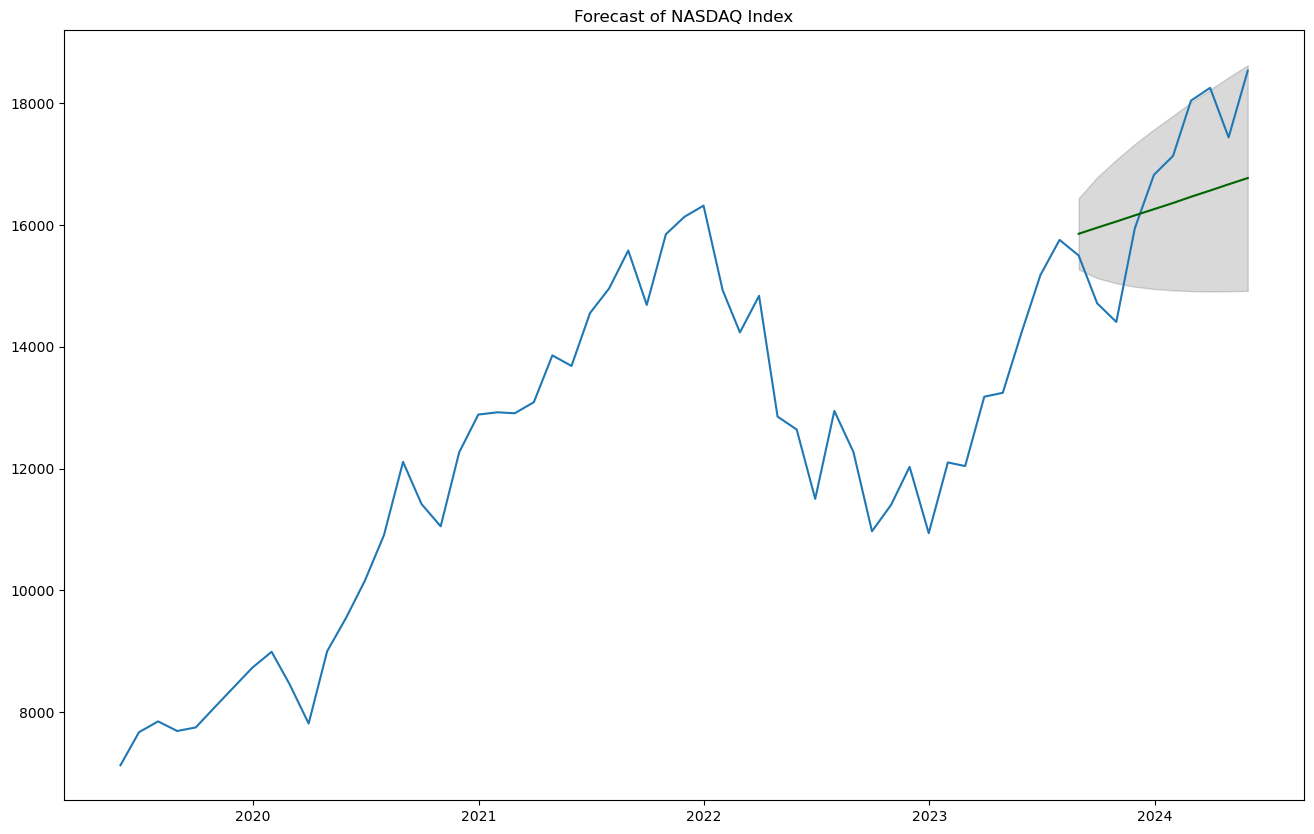

In [147]:
# Plot
plt.figure(figsize=(16,10))
plt.plot(NAS_index_M['price'][400:])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower.index, 
                 lower, 
                 upper, 
                 color='k', alpha=.15)

plt.title("Forecast of NASDAQ Index")
plt.show()